# Imports

In [1]:
import itk
import os
import matplotlib.pyplot as plt

# Reading and Writing

### Reading

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

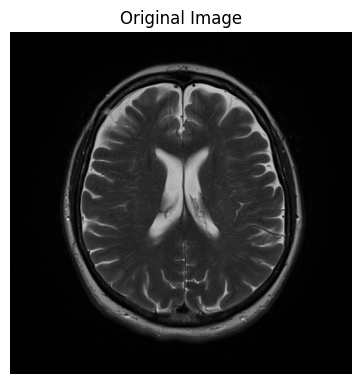

In [2]:
input_file = "./images/Vida_Head.MR.Comp_DR-Gain_DR.1005.1.2021.04.27.14.20.13.818.14380335.dcm"

#define pixel type and dimensiom
input_pixel_type = itk.SS
input_dim = 2
input_img_type = itk.Image[input_pixel_type,input_dim]

#create reader and set filename
reader = itk.ImageFileReader[input_img_type].New()
reader.SetFileName(input_file)

# Read the image
try:
    reader.Update()
except Exception as e:
    print("Exception in file reader:", e)
    
# Convert the read image to a NumPy array and plot it
input_image_array = itk.array_from_image(reader.GetOutput())
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(input_image_array, cmap='gray')
plt.axis('off')

### Alternative Method to Read

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

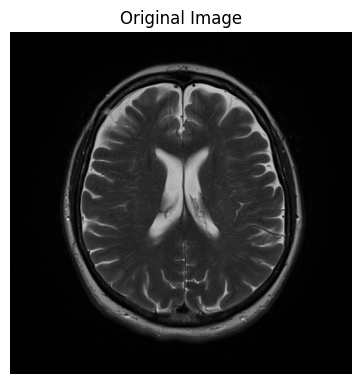

In [3]:
# Read the image
image = itk.imread(input_file)

# Convert the read image to a NumPy array and plot it
input_image_array = itk.array_from_image(image)[0]
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(input_image_array, cmap='gray')
plt.axis('off')


### Writing

In [4]:
output_dcm_file_original = "./images/output_dcm_file_original.dcm"
output_rescaled_dcm_file = "./images/output_rescaled_dcm_file.dcm"
output_jpeg_file = "./images/output_jpeg_file.jpg"

gdcmImageIO = itk.GDCMImageIO.New()

# create a writer to save image back to DICOM file
writer1Type = itk.ImageFileWriter[input_img_type]
writer1 = writer1Type.New()
writer1.SetFileName(output_dcm_file_original)
writer1.SetInput(reader.GetOutput())
writer1.SetImageIO(gdcmImageIO)

try:
    writer1.Update()
except Exception as e:
    print("Exception in file writer:", e)


In [5]:
# Rescale the image intensity
write_pixel_type = itk.UC
write_img_type = itk.Image[write_pixel_type,input_dim]
rescale_filter_type = itk.RescaleIntensityImageFilter[input_img_type,write_img_type]

rescaler = rescale_filter_type.New()
rescaler.SetOutputMinimum(0)
rescaler.SetOutputMaximum(255)
rescaler.SetInput(reader.GetOutput())

writer2Type = itk.ImageFileWriter[write_img_type]
writer2 = writer2Type.New()
writer2.SetFileName(output_jpeg_file)
writer2.SetInput(rescaler.GetOutput())



try:
    writer2.Update()
except Exception as e:
    print("Exception in file writer:", e)


In [6]:
# writing rescaled image to dicom
writer3Type = itk.ImageFileWriter[write_img_type]
writer3 = writer3Type.New()
writer3.SetFileName(output_rescaled_dcm_file)
writer3.SetInput(rescaler.GetOutput())
writer3.UseInputMetaDataDictionaryOff()
writer3.SetImageIO(gdcmImageIO)

try:
    writer3.Update()
except Exception as e:
    print("Exception in file writer:", e)

# Accessing Pixel Values

# Printing Tags of a DICOM 

### One Slice

In [21]:
def read_tags(input_file,plot=True):
    #define pixel type and dimensiom
    input_pixel_type = itk.SS
    input_dim = 2
    input_img_type = itk.Image[input_pixel_type,input_dim]

    #create reader and set filename
    reader = itk.ImageFileReader[input_img_type].New()
    reader.SetFileName(input_file)

    gdcmImageIO = itk.GDCMImageIO.New()
    gdcmImageIO.LoadPrivateTagsOn()
    reader.SetImageIO(gdcmImageIO)  


    # Read the image
    try:
        reader.Update()
    except Exception as e:
        print("Exception in file reader:", e)
        
    metadata = gdcmImageIO.GetMetaDataDictionary()

    # Print the key value pairs from the metadadictionary
    tagkeys = metadata.GetKeys()

    for tagkey in tagkeys:
        # Note the [] operator for the key
        try:
            tagvalue = metadata[tagkey]
            print(tagkey + "=" + str(tagvalue))
        except RuntimeError:
            # Cannot pass specialized values into metadata dictionary.
            print("Cannot pass specialized value" + tagkey + "into metadadictionary")


    print("\n########################\n\n###########################\n")

    entryIDs = ["0010|0010","0010|0020","0008|1030","0008|103e","0008|0021","0020|000d","0020|000e","0020|0013","7fe0|0010"]

    for entryID in entryIDs:
        if not metadata.HasKey(entryID):
            print("tag: " + entryID + " not found in series")
        else:
            # The second parameter is mandatory in python to get the
            # string label value
            label = itk.GDCMImageIO.GetLabelFromTag(entryID, "")
            tagvalue = metadata[entryID]
            print(label[1] + " (" + entryID + ") is: " + str(tagvalue))

    if plot:       
        # Convert the read image to a NumPy array and plot it
        input_image_array = itk.array_from_image(reader.GetOutput())
        plt.figure(figsize=(15, 10))
        plt.subplot(1, 3, 1)
        plt.title("Original Image")
        plt.imshow(input_image_array, cmap='gray')
        plt.axis('off')


    

0008|0000=406
0008|0005=ISO_IR 100
0008|0008=ORIGINAL\PRIMARY\OTHER
0008|0016=1.2.840.10008.5.1.4.1.1.4
0008|0018=1.2.840.113619.2.133.1762890640.1886.1055165016.76
0008|0020=20030625
0008|0021=20030625
0008|0022=20030625
0008|0023=20030625
0008|0030=152734
0008|0031=153128
0008|0032=153128
0008|0033=153128
0008|0050=
0008|0060=MR
0008|0070=GE MEDICAL SYSTEMS
0008|0080=crd 
0008|0090=
0008|1010=sig3ow0 
0008|1030=Tech_1
0008|103e=head scan 
0008|1070=RPM 
0008|1090=GENESIS_SIGNA 
0009|0000=184
0009|0010=GEMS_IDEN_01
0009|1001=GE_GENESIS_FF 
0009|1002=sig3
0009|1004=SIGNA 
0009|1027=1056555088
0009|1030=18387rdmr3
0009|1031=999 
0009|10e3=1.2.840.113619.1.1.4.1762890640
0009|10e6=09
0009|10e7=3238884814
0009|10e9=1056555088
0010|0000=82
0010|0010=Wes Turner
0010|0020=1111
0010|0030=
0010|0040=O 
0010|1010=000Y
0010|1030=68.039
0010|21b0=
0011|0000=30
0011|0010=GEMS_PATI_01
0011|1010=0
0018|0000=428
0018|0020=GR
0018|0021=SS\SP 
0018|0022=FC\VB_GEMS\VASCTOF_GEMS\PFF 
0018|0023=3D
0018|00

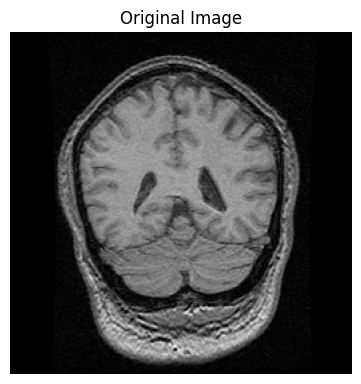

In [22]:
input_file = "./images/DICOMSeries/Image0077/Image0077.dcm"

read_tags(input_file=input_file,plot=True)

### Series of Images

In [18]:
def read_series_of_images_tags(input_dir):
    # Setup the image readers with their type
    PixelType = itk.ctype("signed short")
    Dimension = 3

    ImageType = itk.Image[PixelType, Dimension]

    # Using GDCMSeriesFileNames to generate the names of
    # DICOM files.
    namesGenerator = itk.GDCMSeriesFileNames.New()
    namesGenerator.SetUseSeriesDetails(True)
    namesGenerator.SetDirectory(input_dir)

    # Get the names of files
    fileNames = namesGenerator.GetInputFileNames()

    # Setup the image series reader using GDCMImageIO
    reader = itk.ImageSeriesReader[ImageType].New()
    dicomIO = itk.GDCMImageIO.New()
    dicomIO.LoadPrivateTagsOn()
    reader.SetImageIO(dicomIO)
    reader.SetFileNames(fileNames)

    # Attempt to read the series, exit if unable to.
    try:
        reader.Update()
    except:
        print("Error occured while reading DICOMs in: " + input_dir)

    # ITK internally queries GDCM and obtains all the DICOM tags from the file
    # headers. The tag values are stored in the MetaDataDictionary
    # which is a general-purpose container for \{key,value\} pairs. The Metadata
    # dictionary can be recovered from any ImageIO class by invoking the
    # GetMetaDataDictionary() method.
    metadata = dicomIO.GetMetaDataDictionary()

    # Print the key value pairs from the metadadictionary
    tagkeys = metadata.GetKeys()

    for tagkey in tagkeys:
        # Note the [] operator for the key
        try:
            tagvalue = metadata[tagkey]
            print(tagkey + "=" + str(tagvalue))
        except RuntimeError:
            # Cannot pass specialized values into metadata dictionary.
            print("Cannot pass specialized value" + tagkey + "into metadadictionary")

    print("\n########################\n\n###########################\n")

    entryIDs = ["0010|0010","0010|0020","0008|1030","0008|103e","0008|0021","0020|000d","0020|000e","0020|0013","7fe0|0010"]

    for entryID in entryIDs:
        if not metadata.HasKey(entryID):
            print("tag: " + entryID + " not found in series")
        else:
            # The second parameter is mandatory in python to get the
            # string label value
            label = itk.GDCMImageIO.GetLabelFromTag(entryID, "")
            tagvalue = metadata[entryID]
            print(label[1] + " (" + entryID + ") is: " + str(tagvalue))

In [19]:
input_dir = "./images/DICOMSeries"
read_series_of_images_tags(input_dir=input_dir)

0008|0000=406
0008|0005=ISO_IR 100
0008|0008=ORIGINAL\PRIMARY\OTHER
0008|0016=1.2.840.10008.5.1.4.1.1.4
0008|0018=1.2.840.113619.2.133.1762890640.1886.1055165016.76
0008|0020=20030625
0008|0021=20030625
0008|0022=20030625
0008|0023=20030625
0008|0030=152734
0008|0031=153128
0008|0032=153128
0008|0033=153128
0008|0050=
0008|0060=MR
0008|0070=GE MEDICAL SYSTEMS
0008|0080=crd 
0008|0090=
0008|1010=sig3ow0 
0008|1030=Tech_1
0008|103e=head scan 
0008|1070=RPM 
0008|1090=GENESIS_SIGNA 
0009|0000=184
0009|0010=GEMS_IDEN_01
0009|1001=GE_GENESIS_FF 
0009|1002=sig3
0009|1004=SIGNA 
0009|1027=1056555088
0009|1030=18387rdmr3
0009|1031=999 
0009|10e3=1.2.840.113619.1.1.4.1762890640
0009|10e6=09
0009|10e7=3238884814
0009|10e9=1056555088
0010|0000=82
0010|0010=Wes Turner
0010|0020=1111
0010|0030=
0010|0040=O 
0010|1010=000Y
0010|1030=68.039
0010|21b0=
0011|0000=30
0011|0010=GEMS_PATI_01
0011|1010=0
0018|0000=428
0018|0020=GR
0018|0021=SS\SP 
0018|0022=FC\VB_GEMS\VASCTOF_GEMS\PFF 
0018|0023=3D
0018|00

In [20]:
input_dir = "./images/OneDrive_2024-08-17/DICOM images"
read_series_of_images_tags(input_dir=input_dir)

0008|0005=ISO_IR 100
0008|0008=ORIGINAL\PRIMARY\AXIAL\CT_SOM5 SPI
0008|0016=1.2.840.10008.5.1.4.1.1.2
0008|0018=1.3.6.1.4.1.19291.2.1.3.1140133144321975855136128221127
0008|0020=20160203
0008|0021=20160203
0008|0022=20160203
0008|0023=20160203
0008|0030=141229.982000 
0008|0031=141542.862000 
0008|0032=141603.022108 
0008|0033=141603.022108 
0008|0060=CT
0008|0070=SIEMENS 
0008|0080=NHL 
0008|0081=NAKASERO STREET
KAMPALA/E6E013
UGANDA
UG 
0008|0090=
0008|1010=CTAWP77761
0008|103e=KneeHR  3.0  B60s 
0008|1070=ISAAC M 
0008|1090=Perspective 
0009|0010=SIEMENS CT VA1 DUMMY
0010|0010=Normal Left Arm 
0010|0030=19900203
0010|0040=F 
0010|1010=026Y
0018|0015=EXTREMITY 
0018|0050=3 
0018|0060=130 
0018|0090=500 
0018|1000=77761 
0018|1020=syngo CT 2013A
0018|1030=ExtrRoutineHR 
0018|1100=242 
0018|1110=976.1 
0018|1111=535 
0018|1120=0 
0018|1130=86
0018|1140=CW
0018|1150=1000
0018|1151=70
0018|1152=82
0018|1160=1 
0018|1170=10
0018|1190=0.95
0018|1200=20160203
0018|1201=072615.000000 
0018|1

# Read DICOM Series and Write 3D Image

In [23]:
def convert_2d_3d(input_dir,series=0,dim=3):
    # Define the pixel type and dimension
    pixel_type = itk.ctype("signed short")

    # Create the image type
    img_type = itk.Image[pixel_type, dim]

    # Create a GDCM series file names generator
    name_generator = itk.GDCMSeriesFileNames.New()
    name_generator.SetUseSeriesDetails(True)
    name_generator.AddSeriesRestriction("0008|0021")
    name_generator.SetGlobalWarningDisplay(False)
    name_generator.SetDirectory(input_dir)

    # Get the series UIDs
    series_UID = name_generator.GetSeriesUIDs()
 

    if len(series_UID) < 1:
        print("No DICOMs in: " + input_dir)
    else:
        print("Found series UID(s):", series_UID)

        # Select the first series UID
        series_identifier = series_UID[series]

        # Get the file names for the series
        file_names = name_generator.GetFileNames(series_identifier)
        print(file_names)

        # Create the series reader
        series_reader = itk.ImageSeriesReader[img_type].New()
        series_reader.SetFileNames(file_names)


        dicomIO = itk.GDCMImageIO.New()
        series_reader.SetImageIO(dicomIO)
        series_reader.ForceOrthogonalDirectionOff()

        try:
            # Update the reader to load the image
            series_reader.Update()
            image = series_reader.GetOutput()
            print(f"Successfully read DICOM series into 3D image with size: {image.GetLargestPossibleRegion().GetSize()}")
        except Exception as e:
            print("Error reading DICOM series:", e)


        writer = itk.ImageFileWriter[img_type].New()
        outFileName = os.path.join(input_dir, series_identifier + ".nrrd")
        writer.SetFileName(outFileName)
        writer.UseCompressionOn()
        writer.SetInput(series_reader.GetOutput())
        print("Writing: " + outFileName)
        writer.Update()


In [24]:
input_dir= "./images/DICOMSeries"
series = 0
dim = 3
convert_2d_3d(input_dir=input_dir,series=series,dim=dim)

Found series UID(s): ('1.2.840.113619.2.133.1762890640.1886.1055165015.999.31.625625620030625',)
('./images/DICOMSeries/Image0075.dcm', './images/DICOMSeries/Image0076.dcm', './images/DICOMSeries/Image0077.dcm')
Successfully read DICOM series into 3D image with size: itkSize3 ([256, 256, 3])
Writing: ./images/DICOMSeries\1.2.840.113619.2.133.1762890640.1886.1055165015.999.31.625625620030625.nrrd


In [26]:
input_dir= "./images/OneDrive_2024-08-17/DICOM images"
series = 0
dim = 3
convert_2d_3d(input_dir=input_dir,series=series,dim=dim)

Found series UID(s): ('1.3.6.1.4.1.19291.2.1.2.1140133144321975855136128221126.2351251220160203', '1.3.6.1.4.1.19291.2.1.2.1140133144321975855136128320349.3151251220160203')
('./images/OneDrive_2024-08-17/DICOM images/IM-0001-0222.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0001-0221.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0001-0220.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0001-0219.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0001-0218.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0001-0217.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0001-0216.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0001-0215.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0001-0214.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0001-0213.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0001-0212.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0001-0211.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0001-0210.dcm', './images/OneDrive_

In [27]:
input_dir= "./images/OneDrive_2024-08-17/DICOM images"
series = 1
dim = 3
convert_2d_3d(input_dir=input_dir,series=series,dim=dim)

Found series UID(s): ('1.3.6.1.4.1.19291.2.1.2.1140133144321975855136128221126.2351251220160203', '1.3.6.1.4.1.19291.2.1.2.1140133144321975855136128320349.3151251220160203')
('./images/OneDrive_2024-08-17/DICOM images/IM-0002-0074.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0002-0073.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0002-0072.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0002-0071.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0002-0070.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0002-0069.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0002-0068.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0002-0067.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0002-0066.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0002-0065.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0002-0064.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0002-0063.dcm', './images/OneDrive_2024-08-17/DICOM images/IM-0002-0062.dcm', './images/OneDrive_

# Read DICOM Series and Write DICOM Series

In [33]:
def convert_3d_to_2d_dicom(input_dir, output_dir):
    # Define types
    PixelType = itk.F
    Dimension = 3
    ImageType = itk.Image[PixelType, Dimension]
    
    # Create an ImageSeriesReader
    reader = itk.ImageSeriesReader[ImageType].New()
    
    # Setup GDCMImageIO and NamesGenerator
    gdcm_io = itk.GDCMImageIO.New()
    names_generator = itk.GDCMSeriesFileNames.New()
    names_generator.SetInputDirectory(input_dir)
    
    filenames = names_generator.GetInputFileNames()
    reader.SetImageIO(gdcm_io)
    reader.SetFileNames(filenames)
    
    # Read the 3D volume
    reader.Update()
    image_3d = reader.GetOutput()
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Define types for writing 2D slices
    OutputPixelType = itk.F
    OutputDimension = 2
    Image2DType = itk.Image[OutputPixelType, OutputDimension]
    series_writer = itk.ImageSeriesWriter[ImageType, Image2DType].New()
    
    # Configure the ImageSeriesWriter
    series_writer.SetInput(image_3d)
    series_writer.SetImageIO(gdcm_io)
    names_generator.SetOutputDirectory(output_dir)
    output_filenames = names_generator.GetOutputFileNames()
    series_writer.SetFileNames(output_filenames)
    
    # Copy metadata
    series_writer.SetMetaDataDictionaryArray(reader.GetMetaDataDictionaryArray())
    
    try:
        series_writer.Update()
        print("Conversion Successful")
    except itk.ExceptionObject as excp:
        print("Exception thrown while writing the series:")
        print(excp)
        

In [35]:
input_dir = "./images/OneDrive_2024-08-17/DICOM images"
output_dir = "./images/OneDrive_2024-08-17/DICOM images/DICOM"
convert_3d_to_2d_dicom(input_dir,output_dir)

Conversion Successful


# Update Header

In [43]:

def update_header(input_file,output_file,entry_id,value):
    InputPixelType = itk.SS  # short
    Dimension = 2
    InputImageType = itk.Image[InputPixelType, Dimension]

    # Reader
    reader = itk.ImageFileReader[InputImageType].New()
    reader.SetFileName(input_file)

    # GDCM Image IO
    gdcmImageIO = itk.GDCMImageIO.New()
    reader.SetImageIO(gdcmImageIO)
    reader.Update()

    input_image = reader.GetOutput()

    # Metadata dictionary
    dictionary = input_image.GetMetaDataDictionary()

    label = itk.GDCMImageIO.GetLabelFromTag(entry_id, "")
    tagvalue = dictionary[entry_id]
    print("Current" + label[1] + " (" + entry_id + ") is: " + str(tagvalue))
        
    if dictionary.HasKey(entry_id):
        dictionary[entry_id] = value
    else:
        itk.MetaDataObject[str].SetMetaData(dictionary, entry_id, value)

    # Writer
    writer = itk.ImageFileWriter[InputImageType].New()
    writer.SetInput(reader.GetOutput())
    writer.SetFileName(output_file)
    writer.SetImageIO(gdcmImageIO)
    writer.Update()


In [44]:
input_file = "./images/OneDrive_2024-08-17/IM-0001-0031.dcm"
output_file = "./images/OneDrive_2024-08-17/metadata_changed/Metadata_changed_IM-0001-0031.dcm"
entry_id = "0010|0010"
value = "Asini Jayakody"

update_header(input_file,output_file,entry_id,value)

CurrentPatient's Name (0010|0010) is: Normal Left Arm 
